## LMQG Single Line Plot

<br>

### Development Envrionment

In [ ]:
%pip uninstall xlsxwriter

In [4]:
import os
import glob
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import openpyxl
from openpyxl import Workbook
from openpyxl.drawing.image import Image

In [5]:
pwd

'/'

In [6]:
cd workspace

/workspace


### Plot

In [7]:
def load_xlsx_file(path):

    model_name = []
    path = path
    xlsx_files = glob.glob(os.path.join(path, "*.xlsx"))   
    xlsx_files = sorted(xlsx_files, reverse=False)
    xlsx_files = sorted(xlsx_files, key=len) 
    
    log_dfs = {}
    for xlsx_file in xlsx_files:
        xlsx_file_name = xlsx_file.split("/")[1]
        log_df = pd.read_excel(xlsx_file, engine='openpyxl')
        log_dfs[xlsx_file_name] = log_df.round(4)
        
    print("Log Dataframe\n")

    for key, value in log_dfs.items():
        df_name = key.split(".")[0] + "_df"
        model_name.append(df_name)
        print(df_name)
        globals()[df_name] = value
        
    return model_name

In [8]:
def make_total_runtime(training_times):

    runtime_list= []

    for runtime in training_times:
        runtime = datetime.datetime.strptime(runtime, '%H:%M:%S')
        runtime = runtime.strftime('%H:%M:%S')
        runtime_list.append(runtime)
        
    runtime_dict = {'runtime': runtime_list}
    runtime_df = pd.DataFrame(data=runtime_dict)
    total_runtime = pd.to_timedelta(runtime_df["runtime"]).sum()    
    
    return total_runtime

In [13]:
def make_runtime_log_df():
    
    runtime_log_df = pd.DataFrame({'Model':[0], 'Training Time':[0], 'Evaluation Time':[0]})
    num = 0

    for variable in globals().keys():
        if 'flan_t5' in variable:
            log_df = globals()[variable]
            training_times = log_df['Training Time']
            total_training_time = make_total_runtime(training_times)

            evaluation_times = log_df['Evaluation Time'].dropna()
            total_evaluation_time = make_total_runtime(evaluation_times)
            
            num += 1
            runtime_log_df.loc[num] = [variable, total_training_time, total_evaluation_time]
            
    runtime_log_df = runtime_log_df.drop([0], axis = 0)
    runtime_log_df['Training Time'] = runtime_log_df['Training Time'].astype(str).str.split(' ').str[-1]
    runtime_log_df['Evaluation Time'] = runtime_log_df['Evaluation Time'].astype(str).str.split(' ').str[-1]
    runtime_log_df['Training Seconds'] = pd.to_timedelta(runtime_log_df['Training Time'].astype(str)).dt.total_seconds()
    runtime_log_df['Evaluation Seconds'] = pd.to_timedelta(runtime_log_df['Evaluation Time'].astype(str)).dt.total_seconds()
    runtime_log_df = runtime_log_df.astype({'Training Seconds': 'int'})
    runtime_log_df = runtime_log_df.astype({'Evaluation Seconds': 'int'})
    
    runtime_log_df['Model'] = runtime_log_df['Model'].str.replace('flan_t5_small_squad_qg_', '').str.replace('df', '').str.replace('_', ' ')
    
    for idx, value in enumerate(runtime_log_df['Model']):
        
        if value == 'df':
            runtime_log_df.loc[idx+1, 'Model'] = "base"

    runtime_log_df = runtime_log_df.sort_values('Model')
            
    return runtime_log_df

In [10]:
def make_log_plot_df(path, runtime_log_df):
    
    log_path = path + "log_plot.xlsx"
    runtime_log_df.to_excel(log_path, index=False)

    log_plot_pngs = sorted(glob.glob(os.path.join(path, "*.png"))) 

    row_num = -7
    workbook = openpyxl.load_workbook(log_path)
    worksheet = workbook.active
    for idx, log_plot_png in enumerate(log_plot_pngs):
        
        img = Image(log_plot_png) 
        
        if idx == 0:
            row_num += 16
            worksheet.add_image(img, 'A' + str(row_num))

        elif idx >= 1 and idx % 2 == 1:
            row_num += 16
            worksheet.add_image(img, 'A' + str(row_num))
            
        elif idx >= 1 and idx % 2 == 0:
            worksheet.add_image(img, 'N' + str(row_num))
        
    workbook.save(log_path)

In [11]:
path = "log"
model_name = load_xlsx_file(path)

Log Dataframe

flan_t5_small_squad_qg_df


In [14]:
runtime_log_df = make_runtime_log_df()
runtime_log_df

,Model,Training Time,Evaluation Time,Training Seconds,Evaluation Seconds
1,base,02:24:28,01:06:47,8668,4007


In [34]:
path = "plot/flan_t5_small_squad_qg/"
make_log_plot_df(path, runtime_log_df)

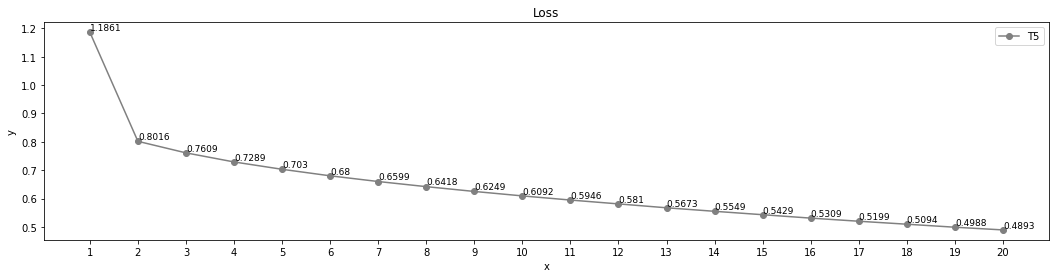

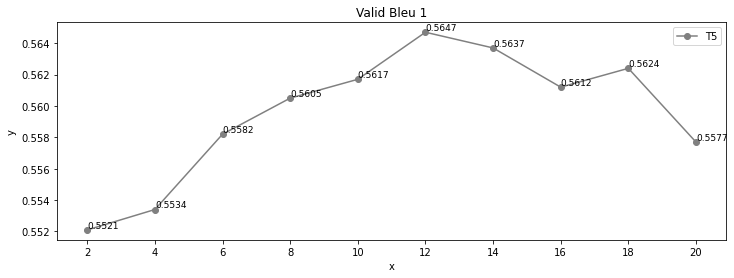

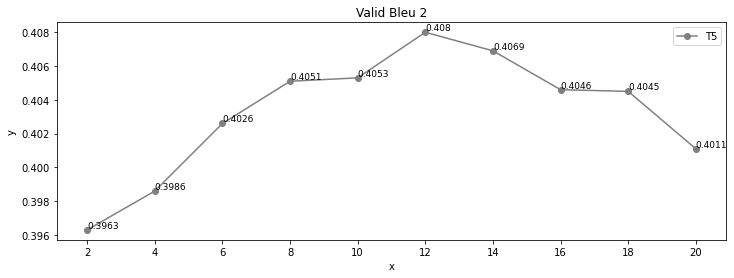

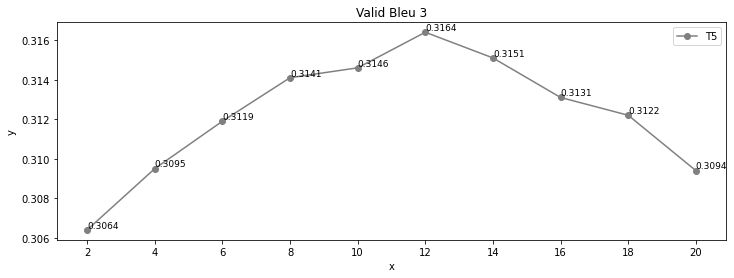

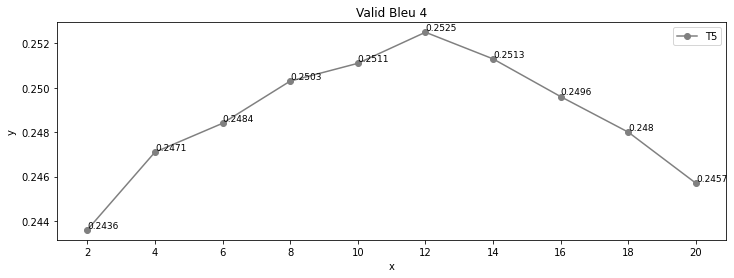

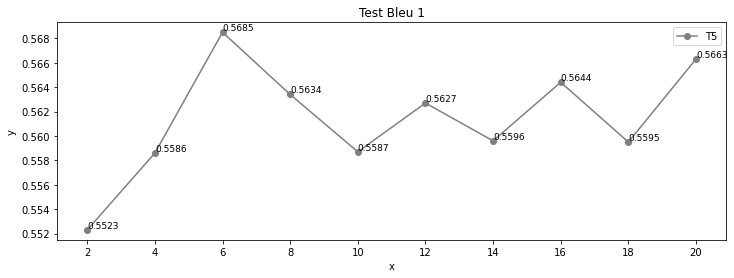

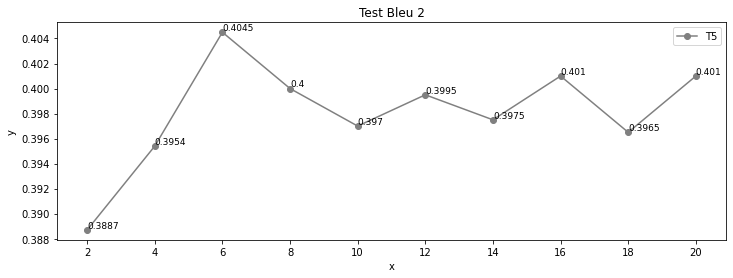

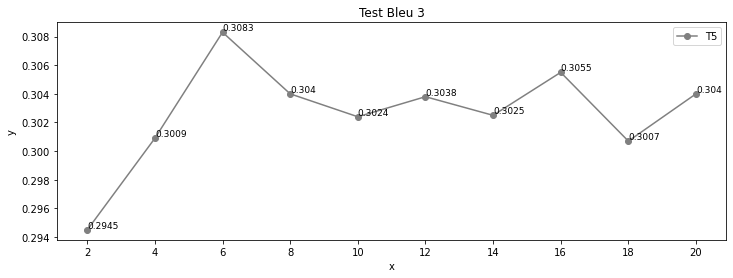

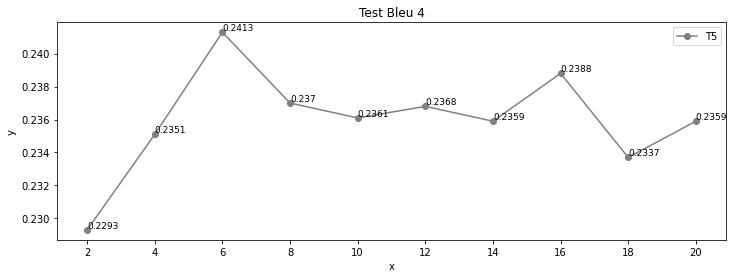

In [12]:

loss_epoch = flan_t5_small_squad_qg_df['Epoch']
bleu_epoch = flan_t5_small_squad_qg_df[flan_t5_small_squad_qg_df['Epoch'] % 2 == 0].reset_index()['Epoch']
loss = flan_t5_small_squad_qg_df['Loss']
valid_bleu_1 = flan_t5_small_squad_qg_df['Valid Bleu 1'].dropna().reset_index()['Valid Bleu 1']
valid_bleu_2 = flan_t5_small_squad_qg_df['Valid Bleu 2'].dropna().reset_index()['Valid Bleu 2']
valid_bleu_3 = flan_t5_small_squad_qg_df['Valid Bleu 3'].dropna().reset_index()['Valid Bleu 3']
valid_bleu_4 = flan_t5_small_squad_qg_df['Valid Bleu 4'].dropna().reset_index()['Valid Bleu 4']
test_bleu_1 = flan_t5_small_squad_qg_df['Test Bleu 1'].dropna().reset_index()['Test Bleu 1']
test_bleu_2 = flan_t5_small_squad_qg_df['Test Bleu 2'].dropna().reset_index()['Test Bleu 2']
test_bleu_3 = flan_t5_small_squad_qg_df['Test Bleu 3'].dropna().reset_index()['Test Bleu 3']
test_bleu_4 = flan_t5_small_squad_qg_df['Test Bleu 4'].dropna().reset_index()['Test Bleu 4']

show_flan_t5_small_squad_qg_df = flan_t5_small_squad_qg_df.drop(['Training Time', 'Evaluation Time'], axis=1).fillna("") 

def make_plot_text(epoch, value):
    for i, v in enumerate(epoch):
        plt.text(v, value[i], value[i], 
                fontsize = 9, color='black', ha="left",
                horizontalalignment='center', verticalalignment='bottom')  
        
plt.figure(figsize=(18, 4))
plt.plot(loss_epoch, loss, marker='o', color='grey', label='T5') 
plt.xlabel('x'); plt.ylabel('y') 
plt.xticks(list(range(1,max(loss_epoch)+1)),[str(i) for i in range(1,max(loss_epoch)+1)])

make_plot_text(loss_epoch, loss)

plt.title('Loss')
plt.legend() 
plt.savefig('plot/flan_t5_small_squad_qg/loss.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(bleu_epoch, valid_bleu_1, marker='o', color='grey', label='T5') 
plt.xlabel('x'); plt.ylabel('y') 
plt.xticks(list(range(2,max(bleu_epoch)+1, 2)),[str(i) for i in range(1,max(bleu_epoch)+1) if i % 2 == 0])

make_plot_text(bleu_epoch, valid_bleu_1)

plt.title('Valid Bleu 1')
plt.legend()
plt.savefig('plot/flan_t5_small_squad_qg/valid_bleu_1.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(bleu_epoch, valid_bleu_2, marker='o', color='grey', label='T5') 
plt.xlabel('x'); plt.ylabel('y') 
plt.xticks(list(range(2,max(bleu_epoch)+1, 2)),[str(i) for i in range(1,max(bleu_epoch)+1) if i % 2 == 0])

make_plot_text(bleu_epoch, valid_bleu_2)

plt.title('Valid Bleu 2')
plt.legend()
plt.savefig('plot/flan_t5_small_squad_qg/valid_bleu_2.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(bleu_epoch, valid_bleu_3, marker='o', color='grey', label='T5') 
plt.xlabel('x'); plt.ylabel('y') 
plt.xticks(list(range(2,max(bleu_epoch)+1, 2)),[str(i) for i in range(1,max(bleu_epoch)+1) if i % 2 == 0])

make_plot_text(bleu_epoch, valid_bleu_3)

plt.title('Valid Bleu 3')
plt.legend()
plt.savefig('plot/flan_t5_small_squad_qg/valid_bleu_3.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(bleu_epoch, valid_bleu_4, marker='o', color='grey', label='T5') 
plt.xlabel('x'); plt.ylabel('y') 
plt.xticks(list(range(2,max(bleu_epoch)+1, 2)),[str(i) for i in range(1,max(bleu_epoch)+1) if i % 2 == 0])

make_plot_text(bleu_epoch, valid_bleu_4)

plt.title('Valid Bleu 4')
plt.legend()
plt.savefig('plot/flan_t5_small_squad_qg/valid_bleu_4.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(bleu_epoch, test_bleu_1, marker='o', color='grey', label='T5') 
plt.xlabel('x'); plt.ylabel('y') 
plt.xticks(list(range(2,max(bleu_epoch)+1, 2)),[str(i) for i in range(1,max(bleu_epoch)+1) if i % 2 == 0])

make_plot_text(bleu_epoch, test_bleu_1)
    
plt.title('Test Bleu 1')
plt.legend()
plt.savefig('plot/flan_t5_small_squad_qg/test_bleu_1.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(bleu_epoch, test_bleu_2, marker='o', color='grey', label='T5') 
plt.xlabel('x'); plt.ylabel('y') 
plt.xticks(list(range(2,max(bleu_epoch)+1, 2)),[str(i) for i in range(1,max(bleu_epoch)+1) if i % 2 == 0])
for i, v in enumerate(bleu_epoch):
    plt.text(v, test_bleu_2[i], test_bleu_2[i], 
             fontsize = 9, color='black', ha="left",
             horizontalalignment='center', verticalalignment='bottom')  
plt.title('Test Bleu 2')
plt.legend()
plt.savefig('plot/flan_t5_small_squad_qg/test_bleu_2.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(bleu_epoch, test_bleu_3, marker='o', color='grey', label='T5') 
plt.xlabel('x'); plt.ylabel('y') 
plt.xticks(list(range(2,max(bleu_epoch)+1, 2)),[str(i) for i in range(1,max(bleu_epoch)+1) if i % 2 == 0])
for i, v in enumerate(bleu_epoch):
    plt.text(v, test_bleu_3[i], test_bleu_3[i], 
             fontsize = 9, color='black', ha="left",
             horizontalalignment='center', verticalalignment='bottom')  
plt.title('Test Bleu 3')
plt.legend()
plt.savefig('plot/flan_t5_small_squad_qg/test_bleu_3.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(bleu_epoch, test_bleu_4, marker='o', color='grey', label='T5') 
plt.xlabel('x'); plt.ylabel('y') 
plt.xticks(list(range(2,max(bleu_epoch)+1, 2)),[str(i) for i in range(1,max(bleu_epoch)+1) if i % 2 == 0])
for i, v in enumerate(bleu_epoch):
    plt.text(v, test_bleu_4[i], test_bleu_4[i], 
             fontsize = 9, color='black', ha="left",
             horizontalalignment='center', verticalalignment='bottom')  
plt.title('Test Bleu 4')
plt.legend()
plt.savefig('plot/flan_t5_small_squad_qg/test_bleu_4.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()